In [15]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


In [8]:
# load csv file
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\all_combined.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7524\2115496660.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ADMIN\Downloads\all_combined.csv")


In [16]:
#Clean the numeric columns
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].replace('r[\$,]', '', regex=True), errors='coerce')
df['domestic_gross_y'] = pd.to_numeric(df['domestic_gross_y'].replace(r'[\$,]', '', regex=True), errors='coerce')



<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7524\1666036202.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].replace('[\$,]', '', regex=True), errors='coerce')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7524\1666036202.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['domestic_gross_y'] = pd.to_numeric(df['domestic_gross_y'].replace('[\$,]', '', regex=True), errors='coerce')


In [17]:
# Define groups based on rating
high_rating = df[df['vote_average'] > 7]
low_rating = df[df['vote_average'] <= 7]


In [18]:
# Drop missing values for revenue
high_revenue = high_rating['worldwide_gross'].dropna()
low_revenue = low_rating['worldwide_gross'].dropna()



In [19]:
# Run t-test
t_stat, p_value = ttest_ind(high_revenue, low_revenue, equal_var=False)


In [20]:
# Print results
print("=== Hypothesis Test: High vs Low Rated Movies ===")
print(f"Mean Revenue (High Rating > 7): ${high_revenue.mean():,.2f}")
print(f"Mean Revenue (Low Rating ≤ 7): ${low_revenue.mean():,.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")


=== Hypothesis Test: High vs Low Rated Movies ===
Mean Revenue (High Rating > 7): $264,952,511.49
Mean Revenue (Low Rating ≤ 7): $154,211,163.89
T-statistic: 5.23
P-value: 0.00000


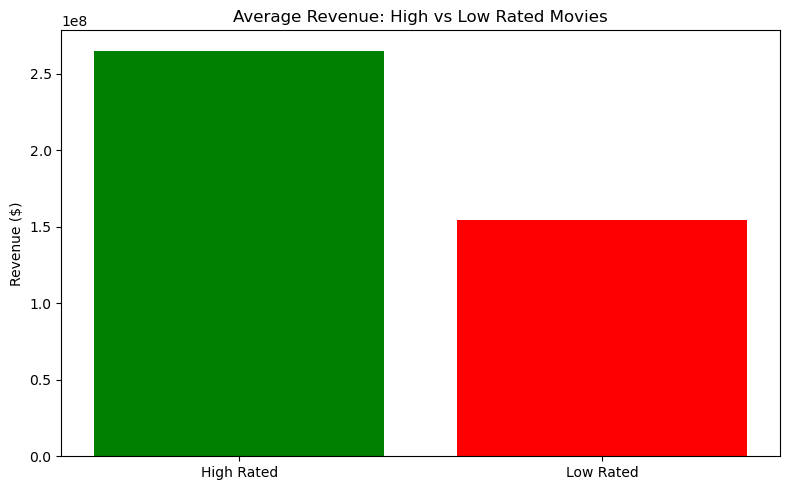

In [21]:
#Plot the comparison
plt.figure(figsize=(8, 5))
plt.bar(['High Rated', 'Low Rated'], [high_revenue.mean(), low_revenue.mean()], color=['green', 'red'])
plt.title('Average Revenue: High vs Low Rated Movies')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [4]:
pip install pandas matplotlib scipy